In [3]:
try:
    from Bio import AlignIO
    from Bio.Align import AlignInfo
except ModuleNotFoundError:
    print("Biopython is not installed or cannot be imported.")
    print("Please install Biopython using: pip install biopython")
    exit()

def read_clustal_alignment(alignment_file):
    try:
        alignment = AlignIO.read(alignment_file, "clustal")
        return alignment
    except FileNotFoundError:
        print(f"File not found: {alignment_file}")
    except ValueError as ve:
        print(f"Error reading alignment: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

def calculate_identity(alignment):
    summary = AlignInfo.SummaryInfo(alignment)
    consensus = summary.dumb_consensus()
    alignment_len = alignment.get_alignment_length()
    
    identities = []
    for record in alignment:
        seq = str(record.seq)
        identity = sum(1 for a, b in zip(seq, consensus) if a == b) / alignment_len * 100
        identities.append((record.id, len(seq), identity))
    
    return identities

def main():
    alignment_file = "/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln"  # Replace with your Clustal format alignment file path

    alignment = read_clustal_alignment(alignment_file)

    if alignment:
        print(f"Alignment loaded from file: {alignment_file}")
        print(f"Alignment length: {alignment.get_alignment_length()}")

        identities = calculate_identity(alignment)
        for record_id, seq_len, identity in identities:
            print(f"Sequence {record_id}: Length = {seq_len}, Identity = {identity:.2f}%")

        # Print sequences and their IDs
        for record in alignment:
            print(f">{record.id}")
            print(record.seq)
            print()  # Print an empty line for separation
    else:
        print("Failed to load the alignment.")

if __name__ == "__main__":
    main()

Alignment loaded from file: /home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln
Alignment length: 197
Sequence original_humancys: Length = 197, Identity = 76.65%
Sequence original_mousecys: Length = 197, Identity = 75.63%
>original_humancys
PQNRKVDCNKGVTGTIYEYGALTLNGEEYIQFKQFAGKHVLFVNVAAYCGLAAQYPELNALQEELKNFGVIVLAFPCNQFGKQEPGTNSEILLGLKYVCPGSGFVPSFQLFEKGDVNGEKEQKVFTFLKNSCPPTSDLLGSSSQLFWEPMKVHDIRWNFEKFLVGPDGVPVMHWFHQAPVSTVKSDILEYLKQFNTH

>original_mousecys
PQKSKVDCNKGVTGTVYEYGANTIDGGEFVNFQQYAGKHILFVNVASFCGLTATYPELNTLQEELKPFNVTVLGFPCNQFGKQEPGKNSEILLGLKYVRPGGGYVPNFQLFEKGDVNGDNEQKVFSFLKNSCPPTSELFGSPEHLFWDPMKVHDIRWNFEKFLVGPDGVPVMRWFHHTPVRIVQSDIMEYLNQTS--



/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/Bio/Align/AlignInfo.py:63: BiopythonDeprecationWarning: The `dumb_consensus` method is deprecated and will be removed in a future release of Biopython. As an alternative, you can convert the multiple sequence alignment object to a new-style Alignment object by via its `.alignment` property, and then create a Motif object. You can then use the `.consensus` or `.degenerate_consensus` property of the Motif object to get a consensus sequence. For more control over how the consensus sequence is calculated, you can call the `calculate_consensus` method on the `.counts` property of the Motif object. This is an example for a multiple sequence alignment `msa` of DNA nucleotides:
>>> from Bio.Seq import Seq
>>> from Bio.SeqRecord import SeqRecord
>>> from Bio.Align import MultipleSeqAlignment
>>> from Bio.Align.AlignInfo import SummaryInfo
>>> msa = MultipleSeqAlignment([SeqRecord(Seq('ACGT')),
...                             SeqRecord(S

In [4]:
try:
    from Bio import AlignIO
except ModuleNotFoundError:
    print("Biopython is not installed or cannot be imported.")
    print("Please install Biopython using: pip install biopython")
    exit()

def read_clustal_alignment(alignment_file):
    try:
        alignment = AlignIO.read(alignment_file, "clustal")
        return alignment
    except FileNotFoundError:
        print(f"File not found: {alignment_file}")
    except ValueError as ve:
        print(f"Error reading alignment: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

def find_different_positions(seq1, seq2):
    differences = []
    for i, (res1, res2) in enumerate(zip(seq1, seq2)):
        if res1 != res2:
            differences.append((i + 1, res1, res2))  # i + 1 to convert to 1-based position
    return differences

def main():
    alignment_file = "/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln"  # Replace with your Clustal format alignment file path

    alignment = read_clustal_alignment(alignment_file)

    if alignment and len(alignment) == 2:
        print(f"Alignment loaded from file: {alignment_file}")
        
        seq1 = str(alignment[0].seq)
        seq2 = str(alignment[1].seq)

        # Find positions with different amino acids
        differences = find_different_positions(seq1, seq2)

        if differences:
            print("Differences:")
            for pos, res1, res2 in differences:
                print(f"Position {pos}: Sequence 1 - {res1}, Sequence 2 - {res2}")
        else:
            print("No differences found between the two sequences.")
    else:
        print("Alignment could not be loaded or does not contain exactly two sequences.")

if __name__ == "__main__":
    main()

Alignment loaded from file: /home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln
Differences:
Position 3: Sequence 1 - N, Sequence 2 - K
Position 4: Sequence 1 - R, Sequence 2 - S
Position 16: Sequence 1 - I, Sequence 2 - V
Position 22: Sequence 1 - L, Sequence 2 - N
Position 24: Sequence 1 - L, Sequence 2 - I
Position 25: Sequence 1 - N, Sequence 2 - D
Position 27: Sequence 1 - E, Sequence 2 - G
Position 29: Sequence 1 - Y, Sequence 2 - F
Position 30: Sequence 1 - I, Sequence 2 - V
Position 31: Sequence 1 - Q, Sequence 2 - N
Position 33: Sequence 1 - K, Sequence 2 - Q
Position 35: Sequence 1 - F, Sequence 2 - Y
Position 40: Sequence 1 - V, Sequence 2 - I
Position 47: Sequence 1 - A, Sequence 2 - S
Position 48: Sequence 1 - Y, Sequence 2 - F
Position 52: Sequence 1 - A, Sequence 2 - T
Position 54: Sequence 1 - Q, Sequence 2 - T
Position 60: Sequence 1 - A, Sequence 2 - T
Position 67: Sequence 1 - N, Sequence 2 - P
Position 69: Sequence 1 - G, Sequence 2 - N
Po

Alignment loaded from file: /home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln
Differences found at positions: [3, 4, 16, 22, 24, 25, 27, 29, 30, 31, 33, 35, 40, 47, 48, 52, 54, 60, 67, 69, 71, 74, 87, 99, 102, 104, 107, 119, 120, 126, 137, 139, 142, 143, 144, 148, 173, 177, 178, 181, 182, 184, 188, 192, 194, 195, 196, 197]
Plot saved to: differences_plot.png


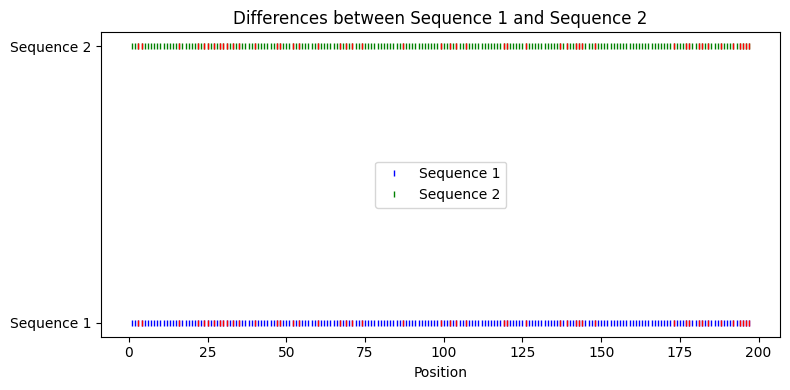

In [5]:
try:
    from Bio import AlignIO
    import matplotlib.pyplot as plt
except ModuleNotFoundError as e:
    print(f"Error importing module: {e}")
    print("Please make sure Biopython and matplotlib are installed.")
    exit()

def read_clustal_alignment(alignment_file):
    try:
        alignment = AlignIO.read(alignment_file, "clustal")
        return alignment
    except FileNotFoundError:
        print(f"File not found: {alignment_file}")
    except ValueError as ve:
        print(f"Error reading alignment: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

def find_different_positions(seq1, seq2):
    differences = []
    for i, (res1, res2) in enumerate(zip(seq1, seq2)):
        if res1 != res2:
            differences.append(i + 1)  # i + 1 to convert to 1-based position
    return differences

def plot_differences(seq1, seq2, differences, output_file=None):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    ax.plot(range(1, len(seq1) + 1), [1] * len(seq1), '|', color='blue', markersize=5, label='Sequence 1')
    ax.plot(range(1, len(seq2) + 1), [2] * len(seq2), '|', color='green', markersize=5, label='Sequence 2')
    
    for pos in differences:
        ax.plot(pos, 1, '|', color='red', markersize=5)
        ax.plot(pos, 2, '|', color='red', markersize=5)
    
    ax.set_yticks([1, 2])
    ax.set_yticklabels(['Sequence 1', 'Sequence 2'])
    ax.set_xlabel('Position')
    ax.set_title('Differences between Sequence 1 and Sequence 2')
    ax.legend(loc='center')  # Center the legend

    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {output_file}")
    else:
        plt.show()

def main():
    alignment_file = "/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln"  # Replace with your Clustal format alignment file path

    alignment = read_clustal_alignment(alignment_file)

    if alignment and len(alignment) == 2:
        print(f"Alignment loaded from file: {alignment_file}")
        
        seq1 = str(alignment[0].seq)
        seq2 = str(alignment[1].seq)

        # Find positions with different amino acids
        differences = find_different_positions(seq1, seq2)

        if differences:
            print(f"Differences found at positions: {differences}")
            output_file = "differences_plot.png"  # Replace with your desired output file path
            plot_differences(seq1, seq2, differences, output_file)
        else:
            print("No differences found between the two sequences.")
    else:
        print("Alignment could not be loaded or does not contain exactly two sequences.")

if __name__ == "__main__":
    main()

In [53]:
from Bio.PDB import PDBParser

pdb_file = "original_mousecys.pdb"

def print_residues(structure):
    for model in structure:
        for chain in model:
            print(f"Chain ID: {chain.id}")
            for residue in chain:
                print(f"Residue: {residue.id}: {residue.resname}")

# Parse PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("PDB", pdb_file)

# Print residues for each chain
print_residues(structure)


Chain ID: X
Residue: (' ', 1, ' '): PRO
Residue: (' ', 2, ' '): GLN
Residue: (' ', 3, ' '): LYS
Residue: (' ', 4, ' '): SER
Residue: (' ', 5, ' '): LYS
Residue: (' ', 6, ' '): VAL
Residue: (' ', 7, ' '): ASP
Residue: (' ', 8, ' '): CYX
Residue: (' ', 9, ' '): ASN
Residue: (' ', 10, ' '): LYS
Residue: (' ', 11, ' '): GLY
Residue: (' ', 12, ' '): VAL
Residue: (' ', 13, ' '): THR
Residue: (' ', 14, ' '): GLY
Residue: (' ', 15, ' '): THR
Residue: (' ', 16, ' '): VAL
Residue: (' ', 17, ' '): TYR
Residue: (' ', 18, ' '): GLU
Residue: (' ', 19, ' '): TYR
Residue: (' ', 20, ' '): GLY
Residue: (' ', 21, ' '): ALA
Residue: (' ', 22, ' '): ASN
Residue: (' ', 23, ' '): THR
Residue: (' ', 24, ' '): ILE
Residue: (' ', 25, ' '): ASP
Residue: (' ', 26, ' '): GLY
Residue: (' ', 27, ' '): GLY
Residue: (' ', 28, ' '): GLU
Residue: (' ', 29, ' '): PHE
Residue: (' ', 30, ' '): VAL
Residue: (' ', 31, ' '): ASN
Residue: (' ', 32, ' '): PHE
Residue: (' ', 33, ' '): GLN
Residue: (' ', 34, ' '): GLN
Residue: ('

In [57]:
from Bio.PDB import PDBParser
from Bio.PDB.PDBExceptions import PDBConstructionException

pdb_file = "original_mousecys.pdb"

def print_chain_x_residues(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("PDB", pdb_file)

    for model in structure:
        chains = model.get_chains()
        print(f"Chains in Model {model.id}: {[chain.id for chain in chains]}")
        
        try:
            chain_x = model['X']  # Access chain 'X' instead of 'A'
            print(f"Residues in Chain X:")
            for residue in chain_x:
                print(f"Residue {residue.id}: {residue.resname}")
        except KeyError:
            print("Chain X not found in this model.")

# Print details of residues in chain X
print_chain_x_residues(pdb_file)


Chains in Model 0: ['X']
Residues in Chain X:
Residue (' ', 1, ' '): PRO
Residue (' ', 2, ' '): GLN
Residue (' ', 3, ' '): LYS
Residue (' ', 4, ' '): SER
Residue (' ', 5, ' '): LYS
Residue (' ', 6, ' '): VAL
Residue (' ', 7, ' '): ASP
Residue (' ', 8, ' '): CYX
Residue (' ', 9, ' '): ASN
Residue (' ', 10, ' '): LYS
Residue (' ', 11, ' '): GLY
Residue (' ', 12, ' '): VAL
Residue (' ', 13, ' '): THR
Residue (' ', 14, ' '): GLY
Residue (' ', 15, ' '): THR
Residue (' ', 16, ' '): VAL
Residue (' ', 17, ' '): TYR
Residue (' ', 18, ' '): GLU
Residue (' ', 19, ' '): TYR
Residue (' ', 20, ' '): GLY
Residue (' ', 21, ' '): ALA
Residue (' ', 22, ' '): ASN
Residue (' ', 23, ' '): THR
Residue (' ', 24, ' '): ILE
Residue (' ', 25, ' '): ASP
Residue (' ', 26, ' '): GLY
Residue (' ', 27, ' '): GLY
Residue (' ', 28, ' '): GLU
Residue (' ', 29, ' '): PHE
Residue (' ', 30, ' '): VAL
Residue (' ', 31, ' '): ASN
Residue (' ', 32, ' '): PHE
Residue (' ', 33, ' '): GLN
Residue (' ', 34, ' '): GLN
Residue (' 

In [82]:
from Bio.PDB import PDBParser
from Bio.PDB.PDBExceptions import PDBConstructionException
import numpy as np

def calculate_distances_from_residue(pdb_file, ref_residue_id, target_residue_ids, chain_id='X'):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("PDB", pdb_file)

    try:
        model = structure[0]  # Assuming we are working with the first model
        chain = model[chain_id]

        try:
            reference_residue = chain[ref_residue_id]
            ref_coord = reference_residue['CA'].get_coord()  # Using CA atom as reference
        except KeyError as e:
            print(f"Error with reference residue {ref_residue_id}: {e}")
            return None

        distances = {}

        for target_residue_id in target_residue_ids:
            try:
                target_residue = chain[target_residue_id]
                target_coord = target_residue['CA'].get_coord()
                distance = np.linalg.norm(target_coord - ref_coord)
                distances[target_residue_id] = distance
            except KeyError as e:
                print(f"Error with target residue {target_residue_id}: {e}")
                distances[target_residue_id] = None

        return distances

    except KeyError as e:
        print(f"Error: {e}")
        return None
    except PDBConstructionException as e:
        print(f"PDB Construction Error: {e}")
        return None

# Example usage: Calculate distances from residue 49 to the specified positions in chain 'X'
ref_residue_id = (' ', 49, ' ')
target_residue_ids = [
    (' ', 3, ' '), (' ', 4, ' '), (' ', 16, ' '), (' ', 22, ' '), (' ', 24, ' '),
    (' ', 25, ' '), (' ', 27, ' '), (' ', 29, ' '), (' ', 30, ' '), (' ', 31, ' '),
    (' ', 33, ' '), (' ', 35, ' '), (' ', 40, ' '), (' ', 47, ' '), (' ', 48, ' '),
    (' ', 52, ' '), (' ', 54, ' '), (' ', 60, ' '), (' ', 67, ' '), (' ', 69, ' '),
    (' ', 71, ' '), (' ', 74, ' '), (' ', 87, ' '), (' ', 99, ' '), (' ', 102, ' '),
    (' ', 104, ' '), (' ', 107, ' '), (' ', 119, ' '), (' ', 120, ' '), (' ', 126, ' '),
    (' ', 137, ' '), (' ', 139, ' '), (' ', 142, ' '), (' ', 143, ' '), (' ', 144, ' '),
    (' ', 148, ' '), (' ', 173, ' '), (' ', 177, ' '), (' ', 178, ' '), (' ', 181, ' '),
    (' ', 182, ' '), (' ', 184, ' '), (' ', 188, ' '), (' ', 192, ' '), (' ', 194, ' '),
    (' ', 195, ' '), (' ', 196, ' '), (' ', 197, ' ')
]

distances = calculate_distances_from_residue(pdb_file, ref_residue_id, target_residue_ids)

if distances is not None:
    # Print distances from residue 49 to the specified positions
    print(f"Distances from residue {ref_residue_id}:")
    for residue_id, distance in distances.items():
        if distance is not None:
            print(f"Residue {residue_id}: {distance:.2f} Angstroms")
        else:
            print(f"Residue {residue_id}: Distance calculation failed.")
else:
    print("Distance calculation failed.")


Error with target residue (' ', 196, ' '): (' ', 196, ' ')
Error with target residue (' ', 197, ' '): (' ', 197, ' ')
Distances from residue (' ', 49, ' '):
Residue (' ', 3, ' '): 21.63 Angstroms
Residue (' ', 4, ' '): 19.64 Angstroms
Residue (' ', 16, ' '): 27.12 Angstroms
Residue (' ', 22, ' '): 22.91 Angstroms
Residue (' ', 24, ' '): 18.69 Angstroms
Residue (' ', 25, ' '): 20.70 Angstroms
Residue (' ', 27, ' '): 24.28 Angstroms
Residue (' ', 29, ' '): 26.66 Angstroms
Residue (' ', 30, ' '): 26.67 Angstroms
Residue (' ', 31, ' '): 28.12 Angstroms
Residue (' ', 33, ' '): 30.54 Angstroms
Residue (' ', 35, ' '): 28.03 Angstroms
Residue (' ', 40, ' '): 23.17 Angstroms
Residue (' ', 47, ' '): 5.59 Angstroms
Residue (' ', 48, ' '): 3.88 Angstroms
Residue (' ', 52, ' '): 5.20 Angstroms
Residue (' ', 54, ' '): 10.00 Angstroms
Residue (' ', 60, ' '): 19.05 Angstroms
Residue (' ', 67, ' '): 30.74 Angstroms
Residue (' ', 69, ' '): 27.97 Angstroms
Residue (' ', 71, ' '): 23.11 Angstroms
Residue 

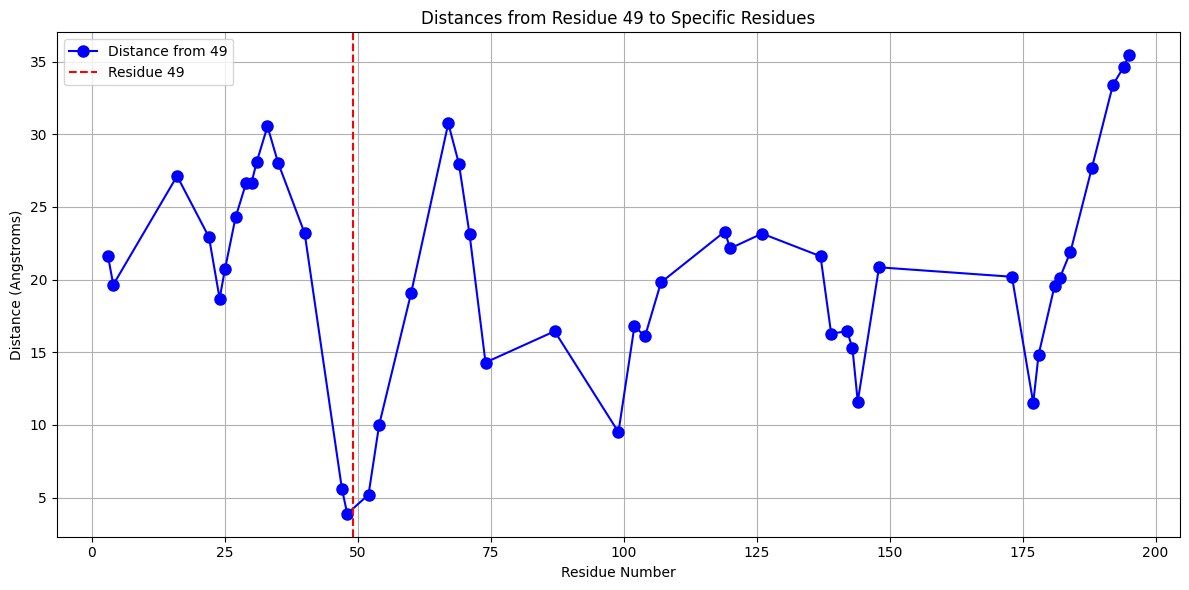

In [84]:
import matplotlib.pyplot as plt

# Data provided
residue_numbers = [3, 4, 16, 22, 24, 25, 27, 29, 30, 31,
                   33, 35, 40, 47, 48, 52, 54, 60, 67, 69,
                   71, 74, 87, 99, 102, 104, 107, 119, 120,
                   126, 137, 139, 142, 143, 144, 148, 173, 177,
                   178, 181, 182, 184, 188, 192, 194, 195]
distances = [21.63, 19.64, 27.12, 22.91, 18.69, 20.70, 24.28, 26.66, 26.67, 28.12,
             30.54, 28.03, 23.17, 5.59, 3.88, 5.20, 10.00, 19.05, 30.74, 27.97,
             23.11, 14.29, 16.44, 9.50, 16.77, 16.10, 19.80, 23.30, 22.14, 23.16,
             21.60, 16.28, 16.44, 15.29, 11.60, 20.84, 20.19, 11.51, 14.81, 19.54,
             20.11, 21.90, 27.64, 33.41, 34.61, 35.43]

# Reference residue 49
ref_residue = 49

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(residue_numbers, distances, marker='o', linestyle='-', color='b', markersize=8, label='Distance from 49')
plt.axvline(x=ref_residue, color='r', linestyle='--', label=f'Residue {ref_residue}')
plt.xlabel('Residue Number')
plt.ylabel('Distance (Angstroms)')
plt.title(f'Distances from Residue {ref_residue} to Specific Residues')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()